### Import the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
data = pd.read_csv("Ecommerce Customers.csv")
data.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [3]:
data.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


### Data Exploration

Various plots are considered under this section to explore the data and identifying the attributes which are having linear relationship.

1. Comparison between 'Time on Website' attribute and 'Yearly Amount Spent' attribute.
2. Comparison between 'Time on App' attribute and 'Yearly Amount Spent' attribute
3. Comparison between 'Time on App' attribute and 'Length of Membership' attribute
4. Comparison between 'Time on Website' attribute and 'Length of Membership' attribute
5. Comparison between 'Length of Membership' attribute and 'Yearly Amount Spent Attribute'
6. Scatter Plot Matrix

In [5]:
sns.set_palette('GnBu_r')

1. Comparison between 'Time on Website' attribute and 'Yearly Amount Spent' attribute.

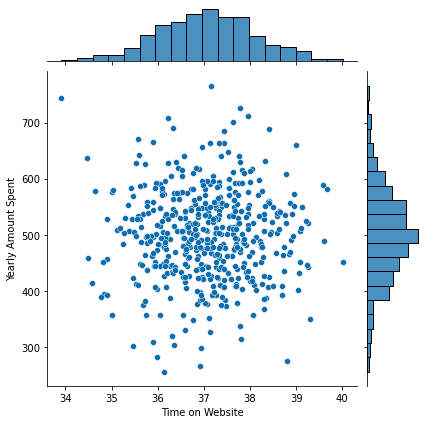

In [6]:
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=data)
plt.show()

2. Comparison between 'Time on App' attribute and 'Yearly Amount Spent' attribute

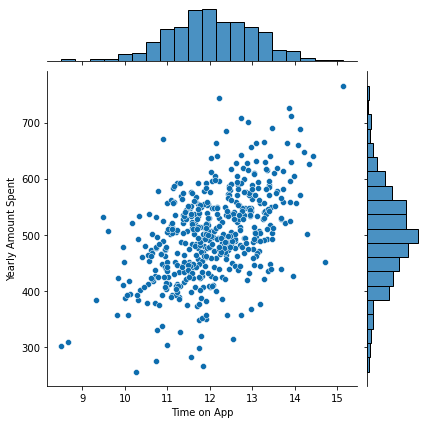

In [7]:
sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=data)
plt.show()

3. Comparison between 'Time on App' attribute and 'Length of Membership' attribute

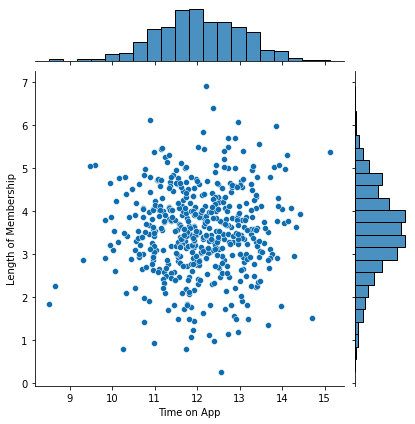

In [8]:
sns.jointplot(x='Time on App',y='Length of Membership',data=data,)
plt.show()

4. Comparison between 'Time on Website' attribute and 'Length of Membership' attribute

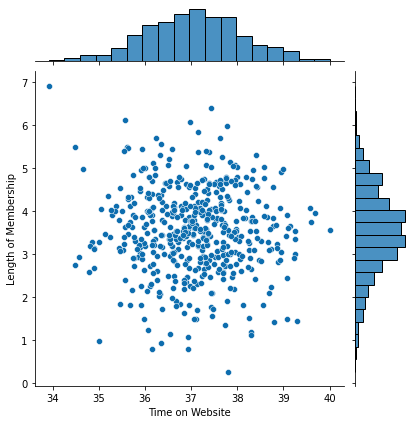

In [9]:
sns.jointplot(x='Time on Website',y='Length of Membership',data=data)
plt.show()

5. Comparison between 'Length of Membership' attribute and 'Yearly Amount Spent Attribute'

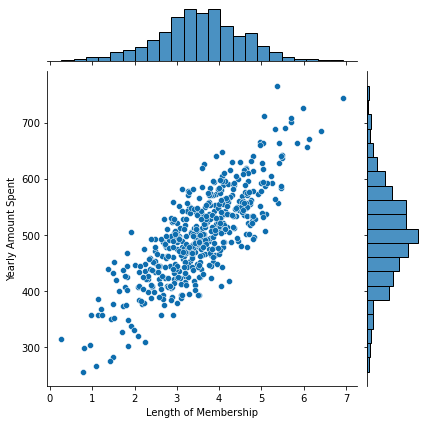

In [10]:
sns.jointplot(x='Length of Membership',y='Yearly Amount Spent',data=data)
plt.show()

6. Attain the plots, each of them indicates the comparison between two attributes

It becoming difficult to consider each of the pair of attributes for a scatter plot to identify the linear relation. So, pairplot() can generate the matrix plot, each plot will be having pair of attributes comparison through scatter plot except diagnol plots. 
Diagnol plot are univariate plots, so these are represented with histograms.

<AxesSubplot:>

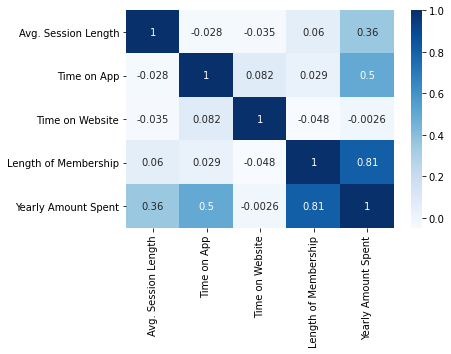

In [11]:
sns.heatmap(data.corr(),annot=True,cmap='Blues')

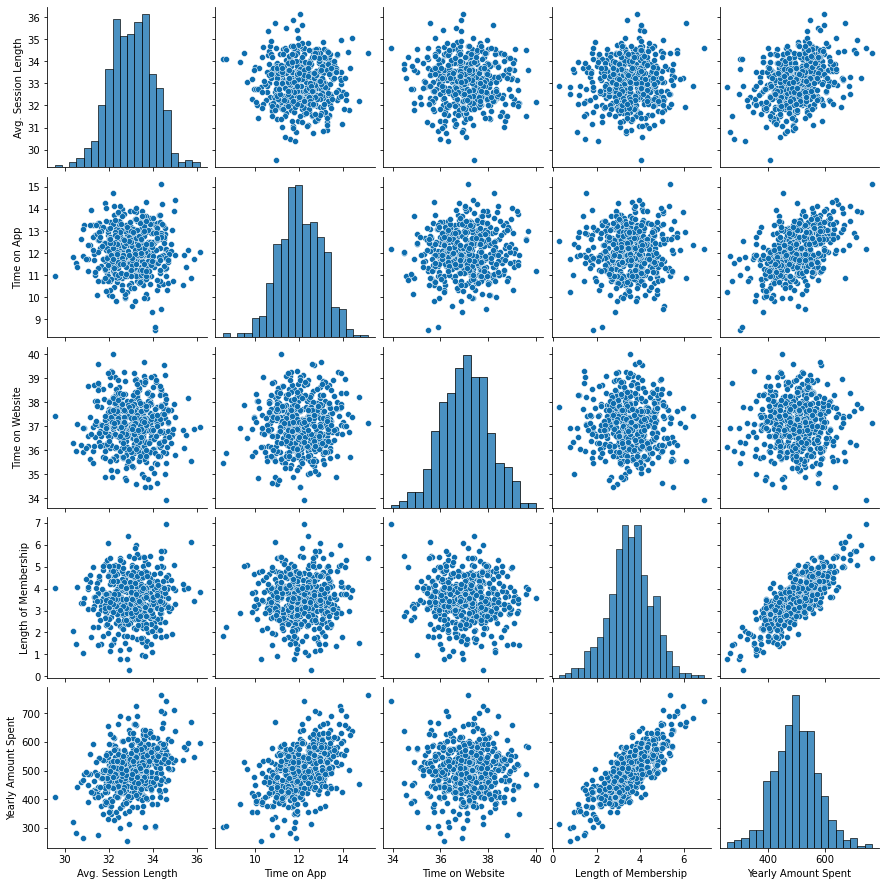

In [12]:
sns.pairplot(data)
plt.show()

From the above attained plot represents a better linear relationship between 'Length of Membership' attribute and 'Yearly Amount Spent Attribute'. This can be identified with the following plot along with possible indication of the linear regression line.

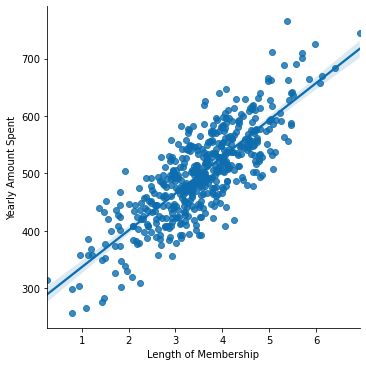

In [13]:
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=data)
plt.show()

Based on these two attributes, let us frame the linear regression model. For that the following steps need to be considered.
1. Obtain the training and testing datasets with the considered attributes from the existing data.
2. Generate the linear regression model
3. Train the generated linear regression model using training dataset.
4. Predict the 'Yearly Amount Spent' attribute values using the trained model along with the testing data.
5. Generate the scatter plot between actual test values against the predicted values to identify normally distributed or not.
6. Evaluate the performance metrics such as 'MAE(Mean Absolute Error)', 'MSE(Mean Squarred Error)', and 'RMSE(Root Mean Squarred Error)'

In [14]:
y=data['Yearly Amount Spent']
#X=data[['Length of Membership']]
#X=data[['Time on App','Length of Membership']]
X=data[['Avg. Session Length','Time on App','Length of Membership']]

1. Obtain the training and testing datasets with the considered attributes from the existing data.

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=10)
# random state value can be set with any value in order to get attain the same output every time while running the kernel

2. Generate the linear regression model

In [16]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()

3. Train the generated linear regression model using training dataset.

In [17]:
lm.fit(X_train,y_train)

print('\n Coefficients: ',lm.coef_) 
# It returns the coefficient of the linear regression model'[Yearly Amount Spent = a * Length of Membership + b]' a will be returned
print('\n Intercept: ',lm.intercept_)
# It returns value b


 Coefficients:  [25.87117378 38.92722758 61.79703431]

 Intercept:  -1043.5135034641912


Linear regression model: Yearly Amount Spent = 25.87 * Avg. Session Length + 38.93 * Time on App + 61.80 * Length of Membership -1043.51

4. Predict the 'Yearly Amount Spent' attribute values using the trained model along with the testing data.

In [18]:
pred =lm.predict(X_test)

5. Generate the scatter plot between actual test values against the predicted values to identify normally distributed or not.

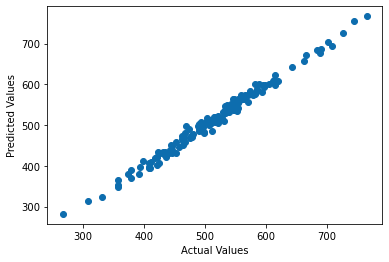

In [19]:
plt.scatter(y_test,pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

6. Evaluate the performance metrics such as 'MAE(Mean Absolute Error)', 'MSE(Mean Squarred Error)', and 'RMSE(Root Mean Squarred Error)'

In [20]:
from sklearn import metrics
print('\n MAE= ', metrics.mean_absolute_error(y_test,pred))
print('\n MSE= ', metrics.mean_squared_error(y_test,pred))
print('\n RMSE= ', np.sqrt(metrics.mean_squared_error(y_test,pred)))


 MAE=  7.748292299951598

 MSE=  91.29481846995931

 RMSE=  9.554832205222617


#### Checking for errors distribution

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Yearly Amount Spent', ylabel='Density'>

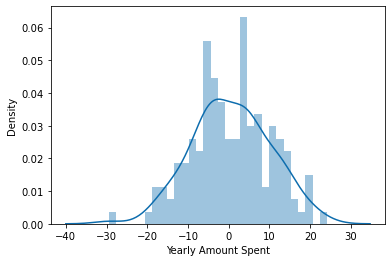

In [21]:
sns.distplot((y_test-pred),bins=30)

In [22]:
variance = metrics.explained_variance_score(y_test,pred)
print('\n Variation: ', variance)


 Variation:  0.9875339192757606
